<a><img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" align="center"></a>

<h1>Bank Credit Card Data Predicting Annual Income   </h1>
<h2>Description</h2>



### A Credit Card Dataset for Machine Learning!

Credit cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. 
 
At present, with the development of machine learning algorithms. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

Banks objective is to predict the threshold annual income so that they can set some standards for  the process of accepting and rejecting the applications for the product! 

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#Section_1"> Importing Data </a></li>
    <li><a href="#Section_2">Question 1: Display the data types of each column using the attribute dtype </a> </li>
    <li><a href="#Section_3">Question 2:  Use the method value_counts to count the frequency of Name Income Type, use the method .to_frame () to convert it to a dataframe. </a></li>
    <li><a href="#Section_4">Question 3: Perform a statistical summary and analysis of Years_Working using describe() function </a></li>
    <li><a href="#Section_5">Question 4:Use the function boxplot in the seaborn library to produce a plot that can be used to show the Years_Working. </a></li>
    <li><a href="#Section_6">Question 5 Use the function regplot in the seaborn library to determine if the Age is negatively or positively correlated with the Annual Income. </a></li>
    <li><a href="#Section_7">Question 6 Fit a linear regression model to predict the Years_Working against the annual income and then calculate R^2. Take a screenshot of your code and the value of the R^2.  </a></li>
    <li><a href="#Section_8">Question 7 Make a distribution plot of actual and fitted values. Interpret the results.  </a></li>
    <li><a href="#Section_9">Question 8 Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. Take a screenshot of your code and the R^2.</a></li>
    <li><a href="#Section_10">Question 9 Identify optimal regularization parameter value using grid search. Then create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. Take a screenshot for your code and the R^2 </a></li>
<li><a href="#Section_11">Question 10 Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, identifying the regularization parameter value using grid search </a></li>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>

### Important Libraries

In [ ]:
!pip install seaborn


In [493]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as tts

### Importing Data

In [506]:
!curl https://raw.githubusercontent.com/hskillup/Course_6_Data_Analysis/master/creditcard_data.csv --output creditcard_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  3  340k    3 12339    0     0   8665      0  0:00:40  0:00:01  0:00:39  8665
 18  340k   18 65808    0     0  31292      0  0:00:11  0:00:02  0:00:09 31292
 78  340k   78  266k    0     0  87924      0  0:00:03  0:00:03 --:--:-- 87924
100  340k  100  340k    0     0   103k      0  0:00:03  0:00:03 --:--:--  103k


In [398]:
Data=pd.read_csv('creditcard_data.csv')

### Question 1 : Display the data types of each column using the attribute dtype 

In [ ]:
# Post Your Answer Here and Execute


### Question 2 : Use the method value_counts to count the frequency of Name Income Type, use the method .to_frame () to convert it to a dataframe. 

In [ ]:
# Post Your Answer Here and Execute


### Question 3 Perform a statistical summary and analysis of Years_Working using describe() function.  


In [ ]:
# Post Your Answer Here and Execute


### Question 4: Use the function boxplot in the seaborn library to produce a plot that can be used to show the Years_Working. 


In [ ]:
# Post Your Answer Here and Execute


### Removing Outliers

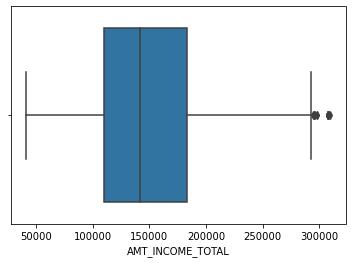

In [405]:
sns.boxplot(Data['AMT_INCOME_TOTAL'])

### User Defined function to remove outliers 

In [406]:
def outlier(col):
    IQR=Data[col].quantile(.75)-Data[col].quantile(.25)
    upper_bound=Data[col].quantile(.75) + ( 1.5 * IQR)
    lower_bound=Data[col].quantile(.25) - ( 1.5 * IQR)
    Data[col].clip(lower=lower_bound,upper=upper_bound,inplace=True)

In [407]:
outlier('AMT_INCOME_TOTAL')

In [408]:
outlier('Years_Working')

### Using one-hot encoding on  Categorical Variables

In [409]:
Categ_Data=pd.get_dummies(Data.select_dtypes('object'),drop_first=True) 

In [410]:
Data.drop(Data.select_dtypes('object').columns.values.tolist(),axis=1,inplace=True)

In [411]:
Data=pd.concat([Data,Categ_Data],axis=1)

In [505]:
Data.head()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,Age,...,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,STATUS_1,STATUS_2,STATUS_5,STATUS_C,STATUS_X
0,5008838,1,129820.0,1,0,0,0,3,-9,32,...,1,0,0,0,0,0,0,0,0,1
1,5008839,1,129820.0,1,0,0,0,3,0,32,...,1,0,0,0,0,0,0,0,1,0
2,5008840,1,129820.0,1,0,0,0,3,0,32,...,1,0,0,0,0,0,0,0,1,0
3,5008841,1,129820.0,1,0,0,0,3,0,32,...,1,0,0,0,0,0,0,0,0,0
4,5008842,1,129820.0,1,0,0,0,3,0,32,...,1,0,0,0,0,0,0,0,0,0


### Question 5 Use the function regplot in the seaborn library to determine if the Age is negatively or positively correlated with the Annual Income. 


In [ ]:
# Post Your Answer Here and Execute


### Question 6 Fit a linear regression model to predict the Years_Working against the annual income and then calculate R^2. Take a screenshot of your code and the value of the R^2. 

In [417]:
X=np.asarray(Data.Years_Working).reshape(-1,1)
y=np.asarray(Data.AMT_INCOME_TOTAL).reshape(-1,1)

In [ ]:
# Post Your Answer Here and Execute



### Question 7 Make a distribution plot of actual and fitted values. Interpret the results.

In [ ]:
# Post Your Answer Here and Execute


### Question 8 Create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2. Take a screenshot of your code and the R^2. 

In [507]:
X_cols=['MONTHS_BALANCE','Age','Years_Working','NAME_FAMILY_STATUS_Married','NAME_HOUSING_TYPE_Rented apartment']#Select Independent Variables
y_col=['AMT_INCOME_TOTAL']#Select Dependent Variable

In [471]:
X_Data=Data[X_cols]
y=Data[y_col]

In [ ]:
# Post Your Answer Here and Execute


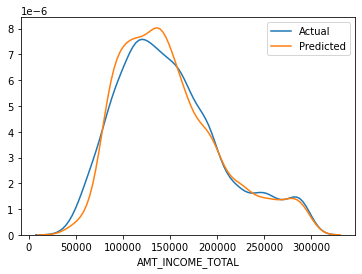

In [481]:
sns.distplot(y.AMT_INCOME_TOTAL,hist=False,label="Actual")
sns.distplot(ypipe,hist=False,label='Predicted')

### Question 9 Identify optimal regularization parameter value using grid search. Then create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the R^2 using the test data. Take a screenshot for your code and the R^2 

In [485]:
# Post Your Answer Here and Execute


### Question 10 Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, identifying the regularization parameter value using grid search

### Splitting Data

In [494]:
train_X,test_X,train_y,test_Y=tts(X_Data,y,test_size=.10,random_state=20) 

In [ ]:
# Post Your Answer Here and Execute


<h2 id="Section_5">  How to submit </h2>

#### **Make sure to toggle on 'Sahre with anyone who has the link' as shown below**

<p>Once you complete your notebook you will have to share it to be marked. Select the icon on the top right a marked in red in the image below, a dialogue box should open, select the option all&nbsp;content excluding sensitive code cells.</p>

<p><img height="440" width="700" src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/EdX/ReadMe%20files/share_noteook1.png" alt="share notebook" /></p>
<p></p>

<p>You can then share the notebook&nbsp; via a&nbsp; URL by scrolling down as shown in the following image:</p>
<p style="text-align: center;"> <img height="308" width="350" src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/EdX/ReadMe%20files/link2.png"  alt="share notebook" /> </p>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### References :

 <a href="https://www.kaggle.com/rikdifos/credit-card-approval-prediction/data?select=credit_record.csv">Bank Data Set </a>
    
    
